In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Setup dataframe and confirm correlations from EDA

In [2]:
data = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [5]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [6]:
#make a new dataframe with the following columns Diabetes_binary, HighBP, PhysHlth, DiffWalk, BMI, GenHlth, HighChol, HeartDiseaseorAttack, Age
Diabetes = data[[ 'HighBP', 'PhysHlth', 'DiffWalk', 'BMI', 'GenHlth', 'HighChol', 'HeartDiseaseorAttack', 'Age']]

In [7]:
# copy diabetes_binary from data into data frame Diabetes2
Diabetes['y'] = data['Diabetes_binary']

C:\Users\shayn\AppData\Local\Temp\ipykernel_20736\3404298381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes['y'] = data['Diabetes_binary']


In [8]:
Diabetes.sample(5)

,HighBP,PhysHlth,DiffWalk,BMI,GenHlth,HighChol,HeartDiseaseorAttack,Age,y
206996,0,7,1,27,4,0,0,13,1
229089,0,0,0,22,2,0,0,6,0
20012,0,2,0,26,3,0,0,4,0
1736,1,1,0,33,2,1,0,9,0
183521,0,2,0,30,2,1,0,13,0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 1, 'HighBP'),
  Text(1.5, 1, 'PhysHlth'),
  Text(2.5, 1, 'DiffWalk'),
  Text(3.5, 1, 'BMI'),
  Text(4.5, 1, 'GenHlth'),
  Text(5.5, 1, 'HighChol'),
  Text(6.5, 1, 'HeartDiseaseorAttack'),
  Text(7.5, 1, 'Age'),
  Text(8.5, 1, 'y')])

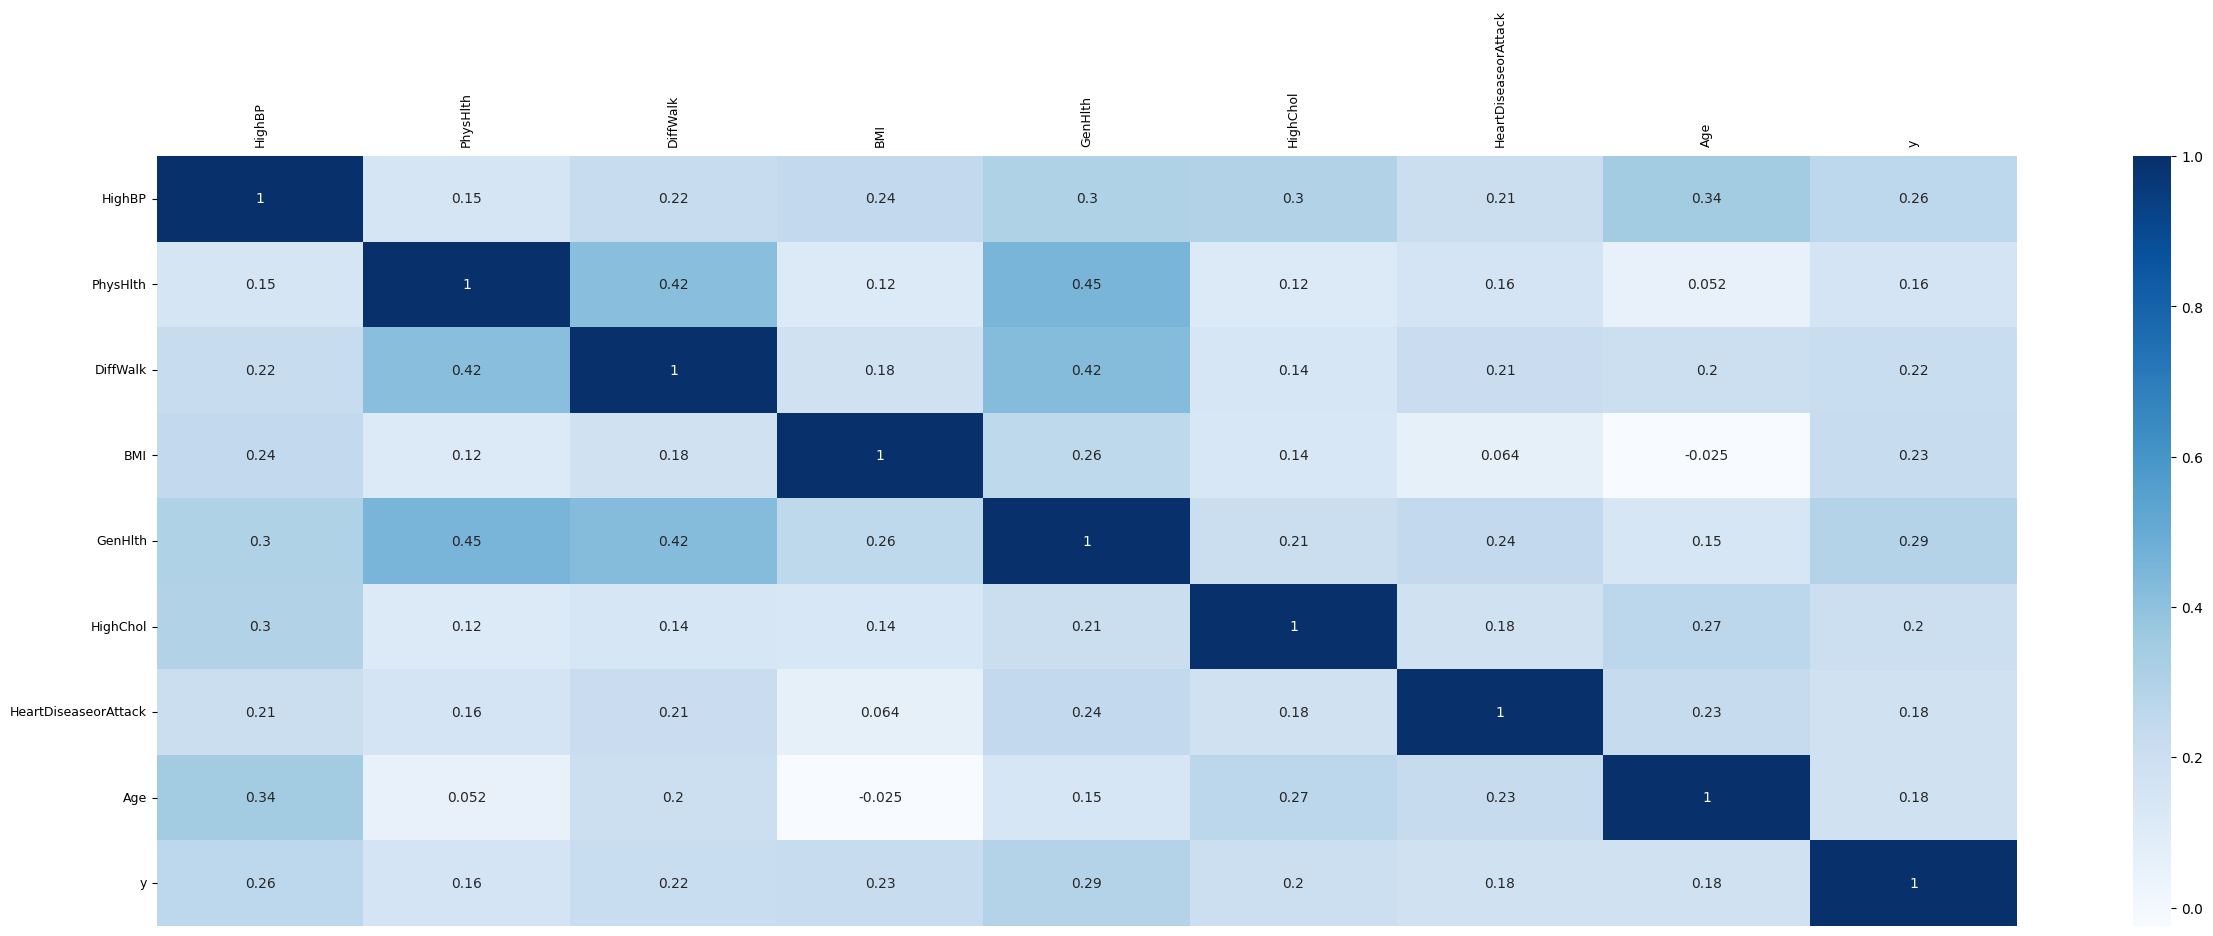

In [9]:
DataCorr_Bin_full = Diabetes.corr(method="spearman")
plt.figure(figsize=(30, 10))
sns.heatmap(DataCorr_Bin_full, cmap="Blues", annot=True)
plt.tick_params(axis='both', which='major', labelsize=9, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)

# Start Keras Neural Network

In [10]:
Dia_train, Dia_test = train_test_split(Diabetes.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.1,
                                              stratify=Diabetes.y.values)

In [11]:
Dia_train.head()

,HighBP,PhysHlth,DiffWalk,BMI,GenHlth,HighChol,HeartDiseaseorAttack,Age,y
177034,1,0,0,29,1,1,0,6,0
186073,0,0,1,22,3,1,0,13,0
219915,0,2,0,28,2,0,0,7,0
130971,1,0,0,25,1,1,0,9,0
153342,0,15,0,24,4,0,0,2,0


In [12]:
Dia_tt, Dia_val = train_test_split(Dia_train,
                                       shuffle=True,
                                       random_state=294,
                                       test_size=.15,
                                       stratify=Dia_train.y)

In [13]:
scale = StandardScaler()

X_tt = scale.fit_transform(Dia_train[Diabetes.columns[:-1]].values)


X_val = scale.transform(Dia_val[Diabetes.columns[:-1]].values)

y_tt = Dia_train.y.values
y_val = Dia_val.y.values

In [14]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

In [15]:
model1 = models.Sequential()

In [16]:
model1.add(layers.Dense(5, activation='relu', input_shape=(X_tt.shape[1],)))

In [17]:
model1.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

In [20]:
## You'll train the model for 40 epochs
n_epochs = 10

history1 = model1.fit(X_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_val, 
                                          y_val))

Epoch 1/10
9133/9133 [==============================] - 7s 712us/step - loss: 0.3341 - accuracy: 0.8562 - val_loss: 0.3171 - val_accuracy: 0.8647
Epoch 2/10
9133/9133 [==============================] - 6s 703us/step - loss: 0.3180 - accuracy: 0.8648 - val_loss: 0.3154 - val_accuracy: 0.8656
Epoch 3/10
9133/9133 [==============================] - 7s 716us/step - loss: 0.3174 - accuracy: 0.8650 - val_loss: 0.3151 - val_accuracy: 0.8654
Epoch 4/10
9133/9133 [==============================] - 6s 707us/step - loss: 0.3172 - accuracy: 0.8651 - val_loss: 0.3152 - val_accuracy: 0.8660
Epoch 5/10
9133/9133 [==============================] - 7s 719us/step - loss: 0.3171 - accuracy: 0.8650 - val_loss: 0.3148 - val_accuracy: 0.8662
Epoch 6/10
9133/9133 [==============================] - 7s 717us/step - loss: 0.3171 - accuracy: 0.8651 - val_loss: 0.3147 - val_accuracy: 0.8664
Epoch 7/10
9133/9133 [==============================] - 7s 719us/step - loss: 0.3171 - accuracy: 0.8651 - val_loss: 0.3152 -

In [21]:
from sklearn.decomposition import PCA

pca = PCA(3)

X_pca_tt = pca.fit_transform(X_tt)
X_pca_val = pca.transform(X_val)

In [22]:
model2 =  models.Sequential()

model2.add(layers.Dense(5, activation='relu', input_shape=(X_pca_tt.shape[1],)))
model2.add(layers.Dense(5, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))


model2.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


history2 = model2.fit(X_pca_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_pca_val, y_val))

Epoch 1/10
9133/9133 [==============================] - 7s 730us/step - loss: 0.3299 - accuracy: 0.8623 - val_loss: 0.3210 - val_accuracy: 0.8649
Epoch 2/10
9133/9133 [==============================] - 7s 727us/step - loss: 0.3217 - accuracy: 0.8648 - val_loss: 0.3205 - val_accuracy: 0.8655
Epoch 3/10
9133/9133 [==============================] - 7s 726us/step - loss: 0.3214 - accuracy: 0.8651 - val_loss: 0.3198 - val_accuracy: 0.8656
Epoch 4/10
9133/9133 [==============================] - 7s 730us/step - loss: 0.3213 - accuracy: 0.8649 - val_loss: 0.3198 - val_accuracy: 0.8660
Epoch 5/10
9133/9133 [==============================] - 7s 727us/step - loss: 0.3212 - accuracy: 0.8649 - val_loss: 0.3196 - val_accuracy: 0.8656
Epoch 6/10
9133/9133 [==============================] - 7s 718us/step - loss: 0.3213 - accuracy: 0.8650 - val_loss: 0.3196 - val_accuracy: 0.8661
Epoch 7/10
9133/9133 [==============================] - 7s 720us/step - loss: 0.3211 - accuracy: 0.8649 - val_loss: 0.3194 -

In [23]:
model3 =  models.Sequential()

model3.add(layers.Dense(10, activation='relu', input_shape=(X_tt.shape[1],)))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))


model3.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


history3 = model3.fit(X_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_val, y_val))

Epoch 1/10
9133/9133 [==============================] - 7s 719us/step - loss: 0.3226 - accuracy: 0.8636 - val_loss: 0.3178 - val_accuracy: 0.8667
Epoch 2/10
9133/9133 [==============================] - 6s 703us/step - loss: 0.3179 - accuracy: 0.8656 - val_loss: 0.3148 - val_accuracy: 0.8665
Epoch 3/10
9133/9133 [==============================] - 6s 705us/step - loss: 0.3173 - accuracy: 0.8654 - val_loss: 0.3150 - val_accuracy: 0.8667
Epoch 4/10
9133/9133 [==============================] - 7s 721us/step - loss: 0.3172 - accuracy: 0.8660 - val_loss: 0.3149 - val_accuracy: 0.8666
Epoch 5/10
9133/9133 [==============================] - 7s 739us/step - loss: 0.3172 - accuracy: 0.8658 - val_loss: 0.3149 - val_accuracy: 0.8672
Epoch 6/10
9133/9133 [==============================] - 7s 726us/step - loss: 0.3171 - accuracy: 0.8658 - val_loss: 0.3153 - val_accuracy: 0.8670
Epoch 7/10
9133/9133 [==============================] - 7s 724us/step - loss: 0.3171 - accuracy: 0.8656 - val_loss: 0.3153 -

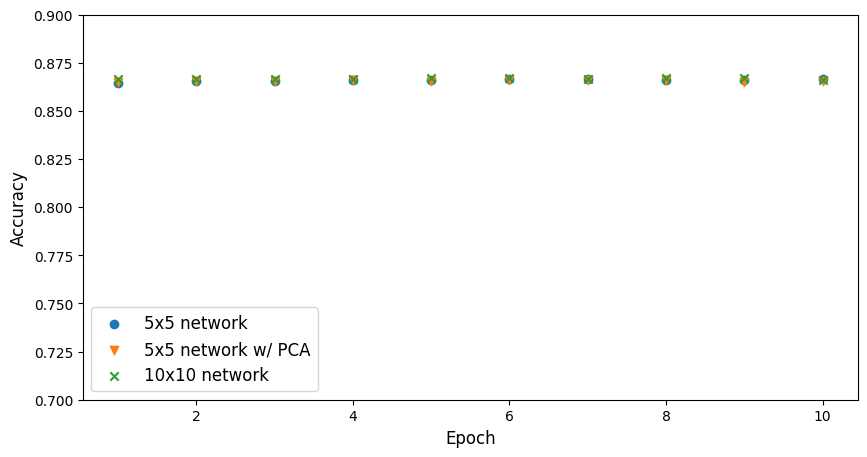

In [24]:
plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1.history['val_accuracy'], 
            label="5x5 network")

plt.scatter(range(1,n_epochs+1), 
            history2.history['val_accuracy'], 
            marker='v',
            label="5x5 network w/ PCA")

plt.scatter(range(1,n_epochs+1), 
            history3.history['val_accuracy'], 
            marker='x',
            label="10x10 network")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.ylim(.7,.9)


plt.legend(fontsize=12)


plt.show()

In [25]:
# test models on  Dia_test

X_test = scale.transform(Dia_test[Diabetes.columns[:-1]].values)
y_test = Dia_test.y.values

X_pca_test = pca.transform(X_test)

model1.evaluate(X_test, y_test)

model2.evaluate(X_pca_test, y_test)

model3.evaluate(X_test, y_test)



793/793 [==============================] - 0s 568us/step - loss: 0.3182 - accuracy: 0.8669


[0.31819596886634827, 0.8669189810752869]